In [1]:
import sys
#sys.path.append("/Users/hejajama/lib/")
#from matplotlibhelper import *
import matplotlib.pylab as plt
plt.style.use('classic')
import scipy.integrate
import scipy.stats
import scipy.interpolate
import math
from numpy import fft
from scipy import special
import numpy as np
import pandas as pd

import numpy.random
plt.rc('axes.formatter', useoffset=False)
import scipy.optimize
import scipy.interpolate
from scipy.optimize import curve_fit
%matplotlib inline
import os
legfont=18
#from  matplotlib.ticker import MaxNLocator
#from hankel import SymmetricFourierTransform
lw=1.5
plt.style.use('default')
plt.rc("xtick", labelsize=legfont)
plt.rc("ytick", labelsize=legfont)
plt.rcParams.update({'font.size': 16})

GEVSQRTONB = 1.0e7/(5.068*5.068)
GEVSQRTOMB = GEVSQRTONB / 1e6

legfont=13
labelfont=14


# Import dipole grid

In [2]:
def AverageTable(prefix, minconf=0,maxconf=0, save_avg_output=""):
    data=[]
    for i in range(minconf,maxconf+1):
        data.append(np.loadtxt(prefix + str(i)))
    
    data=np.array(data)
    avgdata=np.mean(data, axis=0)
    
    if save_avg_output!="":
        np.savetxt(save_avg_output, avgdata)
    
    grid = np.array([(r,b,th) for r in np.unique(avgdata[:,0]) for b in np.unique(avgdata[:,1]) for th in np.unique(avgdata[:,2]) ])

    interp = scipy.interpolate.LinearNDInterpolator(grid, avgdata[:,3], fill_value=0)

    # angle averaged dipole
    rbgrid = np.array([(r,b) for r in np.unique(avgdata[:,0]) for b in np.unique(avgdata[:,1])  ])
    
    return interp



In [3]:
#dipole_interpolator=AverageTable("/Users/hejajama/data/gpd/proton_N_1024_L_7.00_q2mu_0.638_Bp_3_y_0_m_0.4_fixed_bmax//steps_0/table_",maxconf=80,
#                       save_avg_output="average_grid_step_0.txt")

In [4]:
def ReadAverageData(file):
    avgdata=np.loadtxt(file)
    grid = np.array([(r,b,th) for r in np.unique(avgdata[:,0]) for b in np.unique(avgdata[:,1]) for th in np.unique(avgdata[:,2]) ])
    interp = scipy.interpolate.LinearNDInterpolator(grid, avgdata[:,3], fill_value=0)
    return interp

In [5]:
dipole_interpolator=ReadAverageData("./average_grid_step_0.txt")

In [6]:
dipole_interpolator(0.5068,0.,0)

array(0.05719066)

Text(0, 0.5, '$N(r,b=3\\,\\mathrm{GeV}^{-1}, \\theta=0)$')

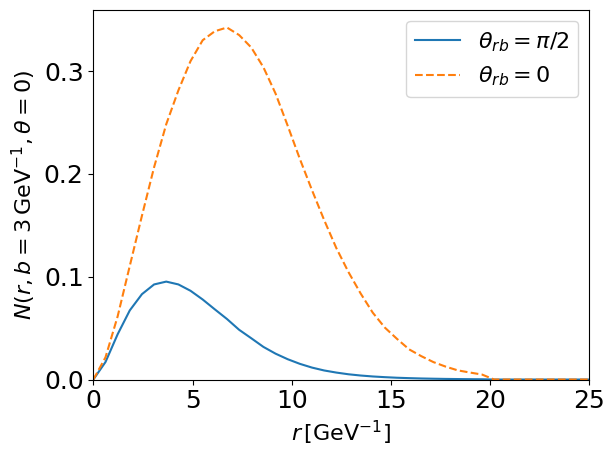

In [7]:
rvals=np.linspace(0,30)
fixed_b=3
plt.plot(rvals, dipole_interpolator(rvals, fixed_b,np.pi/2), label=r"$\theta_{rb}=\pi/2$")
plt.plot(rvals, dipole_interpolator(rvals, fixed_b,0), linestyle="dashed", label=r"$\theta_{rb}=0$")
plt.xlim(left=0, right=25)
leg=plt.legend(loc="upper right")
plt.ylim(bottom=0)
plt.xlabel(r"$r\,[\mathrm{GeV}^{-1}]$")
plt.ylabel(r"$N(r,b=" +str(fixed_b) + r"\,\mathrm{GeV}^{-1}, \theta=0)$")

In [118]:
def fitfun_gaussian(delta,A,B):
    return A*np.exp(-delta**2*B)

[0.24322156 0.13739436]


Text(0, 0.5, '$N(r=2\\,\\mathrm{GeV}^{-1},b, \\theta=0)$')

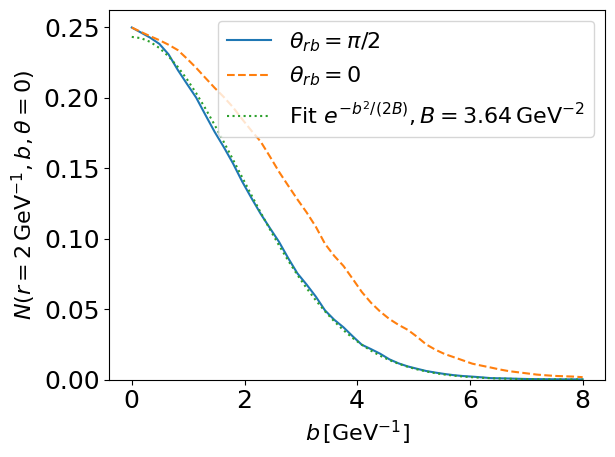

In [130]:
bvals=np.linspace(0,8)
plt.plot(bvals, dipole_interpolator(2, bvals, np.pi/2), label=r"$\theta_{rb}=\pi/2$")
plt.plot(bvals, dipole_interpolator(2, bvals, 0), linestyle="dashed", label=r"$\theta_{rb}=0$")

popt,pcov = scipy.optimize.curve_fit(fitfun_gaussian, bvals, dipole_interpolator(2, bvals, np.pi/2), p0=[0.2,1/(2*4)])
print(popt)
# Note: I want to use common parametrization exp(-b^2/(2B))
# This means that the fit parameter popt[1]=B' = 1/(2B) => B = 1/(2*popt[1])
plt.plot(bvals, fitfun_gaussian(bvals, *popt), label="Fit $e^{-b^2/(2B)}, B=" + str(round(1/(2*popt[1]),2))+ r"\,\mathrm{GeV}^{-2}$", linestyle="dotted")

#plt.xlim(left=0,right=4)
plt.ylim(bottom=0)
leg=plt.legend(loc="upper right")
plt.xlabel(r"$b\,[\mathrm{GeV}^{-1}]$")
plt.ylabel(r"$N(r=2\,\mathrm{GeV}^{-1},b, \theta=0)$")

Text(0, 0.5, '$N(r=b=2\\,\\mathrm{GeV}^{-1}, \\theta)$')

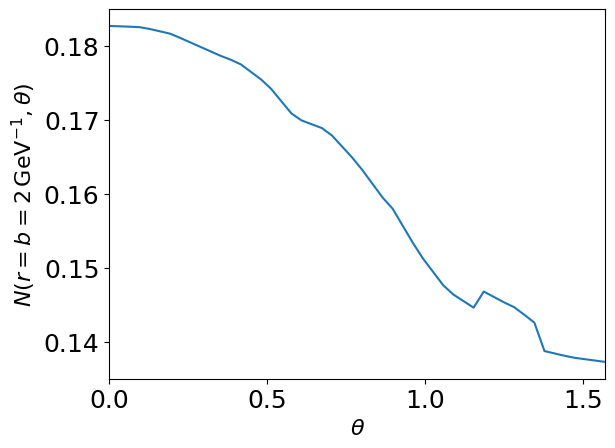

In [9]:
thvals=np.linspace(0,np.pi/2)
plt.plot(thvals, dipole_interpolator(2,2,thvals))
plt.xlim(left=0,right=np.pi/2)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$N(r=b=2\,\mathrm{GeV}^{-1}, \theta)$")


## 2D heatmap to illustrate $r,b$ dependence with different $\theta_{rb}$

After this we will set $\theta_{rb}=\pi/2$ in order to get vanishing dipole at large $r$ and $b$

In [10]:
def Plot2DHeatmap(interpolator, phi):
        maxr=20
        maxb=20
        points=30
        xrange=np.linspace(0,maxr,points)
        yrange=np.linspace(0,maxb,points)
        dx=xrange[1]-xrange[0]
        dy=yrange[1]-yrange[0]

        fig, ax = plt.subplots()
        
        X,Y = np.meshgrid(xrange,yrange)

        Z = interpolator(X,Y, phi)
        cmap = plt.get_cmap("jet")
        c=plt.pcolormesh(X,Y,Z,cmap=cmap)
        fig.colorbar(c,ax=ax)



Compare first with $r\parallel b$, then $r\perp b$

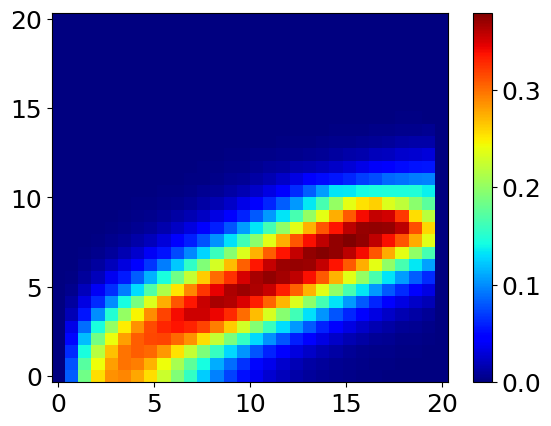

In [11]:
Plot2DHeatmap(dipole_interpolator,0)


Text(0, 0.5, '$b$')

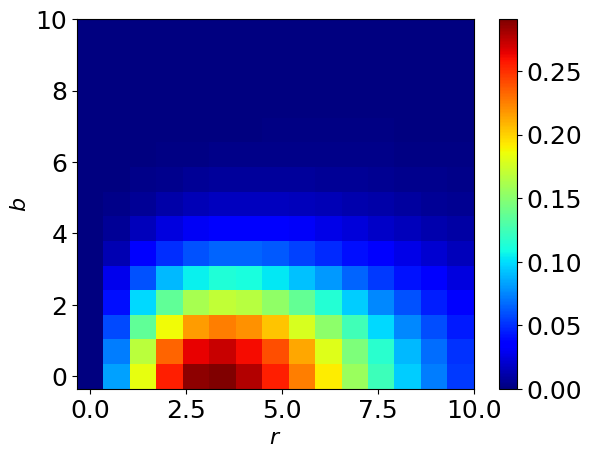

In [12]:
Plot2DHeatmap(dipole_interpolator,np.pi/2)
plt.xlim(right=10)
plt.ylim(top=10)
plt.xlabel(r"$r$")
plt.ylabel(r"$b$")

# FT neglecting angular dependence

To compute FT of $N(r,b)$, it is enough to compute
$$ \mathcal{F}(q,\Delta) \sim \int dr r db b J_0(qr) J_0(b\Delta) [1-N(r,b,\theta_{rb}=\pi/2)]$$
So this is just \"2d Hankel transform\"

Typically I just drop $1-$ part in this notebook at the moment... things may not be fully consistent, but I always compute the FT of the dipole $N$, not $S$. Note that this 1 only gives a delta function contribution that I don't care...

Note that with $\theta(r,b)=\pi/2$ I get $N\to 0$ at $r,b\to \infty$. 

For testing and compariosns: Test 2D Gaussian and integrate that using a brute force integral

In [13]:
def Gaussian_2d(r,b):
    return np.exp(-r**2-b**2)
def GaussianDipole(r,b,th):
    return np.exp(-r**2-b**2)

In [14]:
def BruteForceFT(interpolator, q, Delta):
    integrand = lambda r,b: r*b*scipy.special.j0(q*r)*scipy.special.j0(b*Delta)*interpolator(r,b)
    
    res = scipy.integrate.dblquad(integrand, 0, np.inf, 0, np.inf)
    return res[0]


In [15]:
BruteForceFT(lambda r,b: GaussianDipole(r,b,np.pi/2), 1, 1)

0.15163266492815586

Using the Hankel transform

In [16]:
from hankel import HankelTransform  

In [17]:
hankel_param_h=0.001
hankel_param_N= 3*int(np.pi/hankel_param_h)
global_ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)

Inner function: this computes $\int dr r J_0(qr)N(r,b)$ at fixed $b$

In [18]:
def HankelDipole_rint(interpolator,qvals,b):
    '''Compute Hankel transform r->q at fixed b'''
    #h=0.0001
    #N= 3*int(np.pi/h)
    #ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)
    # Integrand is the function without b*J_0(b*Delta)
    ftfun = lambda r: interpolator(r,b,np.pi/2) # todo average angles
    
    # do not waste time initializing the Hankel transform every time, instead use a previously initialized global global_ht
    global global_ht
    ft=global_ht.transform(ftfun, qvals)
    return ft[0]

Test with Gaussian: should get 0.5 at $q=0$ and $1/(2e^{1/4})\approx 0.3894$ at $q=1$ (with $b=0$)

In [19]:
HankelDipole_rint(GaussianDipole, 0.0, 0)

0.5000000000000001

In [20]:
HankelDipole_rint(GaussianDipole, 1.0, 0)

0.3894003915357024

Now do the Hankel transform of the function defined above from $b$ to $\Delta$

In [21]:
def HankelDipole(interpolator, deltavals, qvals, verbose=False):
    ''' Hankel transform both from r->q and b->delta'''
    #h=0.0001
    #N= 3*int(np.pi/h)
    ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)
    # Integrand is the function without b*J_0(b*Delta)
    data=[]
    for q in qvals:
        row=[]
        ftfun = lambda b: HankelDipole_rint(interpolator, qvals=q, b=b)
        # Might be possible to get better performance by passing all deltavals at once, but 
        # I had trouble getting that to work...
        for d in deltavals:
            ft=ht.transform(np.vectorize(ftfun), d)
            #print("q=",q,"Delta=",d,"ft=",ft)
            row.append(ft[0])
            if verbose:
                #return ft[0]
                print(q,d,ft[0])
        data.append(row)
        print("Ready " + str(round(len(data)/float(len(qvals))*100,2)) + r"%")

        #plt.plot(deltavals,np.abs(row),label="q="+str(q))
    
    X,Y = np.meshgrid(qvals,deltavals)
    points = np.column_stack((X.ravel(), Y.ravel()))
    data=np.array(data)

    
    return scipy.interpolate.LinearNDInterpolator(points, data.ravel(), fill_value=0)
   

### Tests with Gaussian ``dipole''

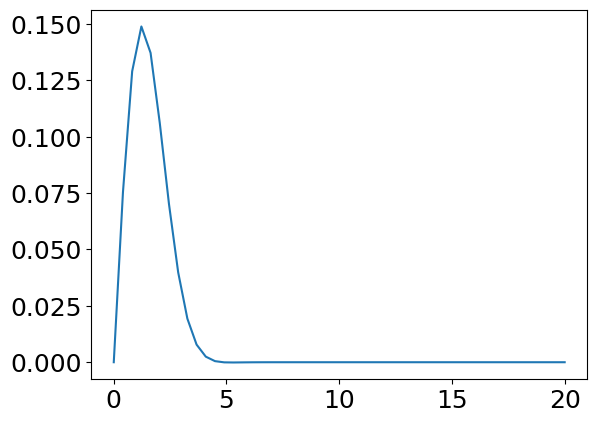

In [22]:
tmpbvals=np.linspace(0,20)
plt.plot(tmpbvals, [b*scipy.special.j0(b*1)*HankelDipole_rint(GaussianDipole, qvals=1, b=b) for b in bvals])
#plt.yscale("log")

In [23]:
def TestHankelHParam(interpolator):
    global hankel_param_h
    global hankel_param_N
    global global_ht

    default_h = hankel_param_h
    default_N = hankel_param_N
    
    # This parameter controls somehow the accuracy and number of bessel nodes included in the Hankel transform
    # In principle (as far as I understand) smaller is better in principle...
    # At least I cant compute at momenta below h
    hvals=[1e-3,1e-2]

    if interpolator == GaussianDipole:
        print("2D FT at q=b=1, should get 0.1516")
    for  h in hvals:
        hankel_param_h=h
        hankel_param_N= 3*int(np.pi/hankel_param_h)
        tmp_hankel = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)
        global_ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h) # HankelDipole_rint uses this
        
        res=tmp_hankel.transform( np.vectorize(lambda b: HankelDipole_rint(interpolator, qvals=1, b=b)), 1)
        print(h,res)

    hankel_param_h = default_h
    hankel_param_N = default_N
    global_ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)
TestHankelHParam(GaussianDipole)
        

2D FT at q=b=1, should get 0.1516
0.001 (0.1516326649281583, array(-0.))
0.01 (0.15163267238707853, array(0.))


Note: default h= 0.001


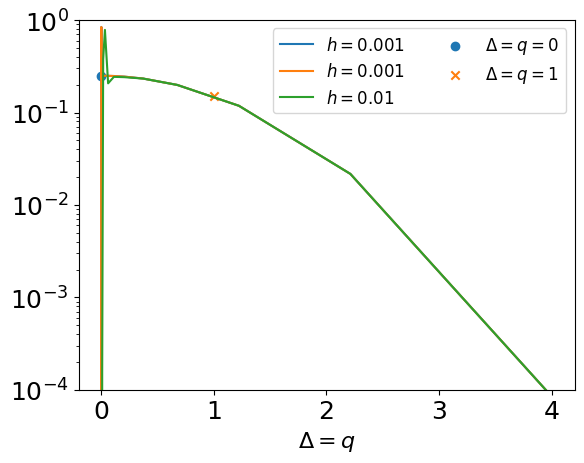

In [24]:
# Same as above but check the h dependence at different q=Delta
# Markers show analytically known values for a Gaussian
def PlotHankel_h_dep(interpolator):
    global hankel_param_h
    global hankel_param_N
    global global_ht

    default_h = hankel_param_h
    default_N = hankel_param_N

    print("Note: default h=", default_h)

    tmpqdelta=np.geomspace(1e-3,4,num=15)

    hvals=[1e-3,default_h,1e-2]
    for  h in hvals:
        hankel_param_h=h
        hankel_param_N= 3*int(np.pi/hankel_param_h)
        tmp_hankel = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)
        global_ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h) #HankelDipole_rint uses this
        
        plt.plot(tmpqdelta, [tmp_hankel.transform( np.vectorize(lambda b: HankelDipole_rint(interpolator, qvals=q, b=b)), q)[0] for q in tmpqdelta], label=r"$h="+str(h)+r"$")
    
    plt.scatter([tmpqdelta[0]], [0.25], label="$\Delta=q=0$", marker="o")
    plt.scatter([1], [1./(4*np.exp(1)**0.5)], label="$\Delta=q=1$", marker="x")

    plt.xlabel(r"$\Delta=q$")
    #plt.xscale("log")
    plt.yscale("log")
    leg=plt.legend(loc="upper right", fontsize=12, ncol=2)
    
    plt.ylim(bottom=1e-4, top=1)

    hankel_param_h = default_h
    hankel_param_N = default_N
    global_ht = HankelTransform(nu=0, N=hankel_param_N, h=hankel_param_h)

PlotHankel_h_dep(GaussianDipole)

In [25]:
hankel_param_h

0.001

***BE CAREFUL:*** The follwoing does not work, because HankelDipole_rint uses global_ht to compute the first Hankel transform! 

In [ ]:
global_ht.transform( lambda b: HankelDipole_rint(GaussianDipole, qvals=1, b=b), 1)

(2.1408643880489738e-08, array(-1.66622985e-10))

From now on we will use interpolators. Still one test for the interpolators at the known points $q=\Delta=0$ and $q=\Delta=1$.

Note that we don't want to go below $h=10^{-3}$

In [ ]:

hankel_interpolator_Gaussian=HankelDipole(GaussianDipole, np.geomspace(1e-3,4,num=10), np.geomspace(1e-3,4,num=10))


Ready 10.0%
Ready 20.0%
Ready 30.0%
Ready 40.0%
Ready 50.0%
Ready 60.0%
Ready 70.0%
Ready 80.0%
Ready 90.0%
Ready 100.0%


In [ ]:
hankel_interpolator_Gaussian(3e-3,3e-3)

array(0.71362729)

In [138]:
hankel_interpolator_Gaussian(1,1)

NameError: name 'hankel_interpolator_Gaussian' is not defined

Text(0.5, 0, '$q=\\Delta$')

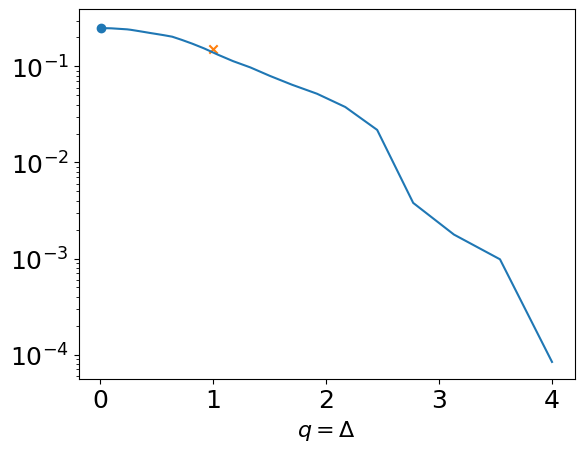

In [ ]:
plt.plot(np.geomspace(1e-2,4), [hankel_interpolator_Gaussian(k,k) for k in np.geomspace(1e-2,4)])
plt.scatter([np.geomspace(1e-2,4)[0]], [0.25], label="$\Delta=q=0$", marker="o")
plt.scatter([1], [1./(4*np.exp(1)**0.5)], label="$\Delta=q=1$", marker="x")
plt.yscale("log")
#plt.xscale("log")
plt.xlabel(r"$q=\Delta$")

# small q=Delta part probably would require smaller h

### Real dipole

In [ ]:
TestHankelHParam(dipole_interpolator)

0.001 (-0.11942943355416696, array(-0.))
0.01 (-0.11610596962670844, array(0.))


In [136]:
momenta_for_hankel_grid=np.linspace(hankel_param_h,4.5,num=50)
print("Hankel grid spacing " , momenta_for_hankel_grid[1]-momenta_for_hankel_grid[0])

Hankel grid spacing  0.09181632653061224


Generating the hankel transform grid takes some time, so we also save the result on disc, the cell below can be used to load it after this is excetued for the first time.

In [137]:
#hankel_interpolator_dipole = HankelDipole(dipole_interpolator, momenta_for_hankel_grid, momenta_for_hankel_grid)
#np.save("ft_interpolator.npy",hankel_interpolator_dipole)

Ready 2.0%
Ready 4.0%
Ready 6.0%
Ready 8.0%
Ready 10.0%
Ready 12.0%
Ready 14.0%
Ready 16.0%
Ready 18.0%
Ready 20.0%
Ready 22.0%
Ready 24.0%
Ready 26.0%
Ready 28.0%
Ready 30.0%
Ready 32.0%
Ready 34.0%
Ready 36.0%
Ready 38.0%
Ready 40.0%
Ready 42.0%
Ready 44.0%
Ready 46.0%
Ready 48.0%
Ready 50.0%
Ready 52.0%
Ready 54.0%
Ready 56.0%
Ready 58.0%
Ready 60.0%
Ready 62.0%
Ready 64.0%
Ready 66.0%
Ready 68.0%
Ready 70.0%
Ready 72.0%
Ready 74.0%
Ready 76.0%
Ready 78.0%
Ready 80.0%
Ready 82.0%
Ready 84.0%
Ready 86.0%
Ready 88.0%
Ready 90.0%
Ready 92.0%
Ready 94.0%
Ready 96.0%
Ready 98.0%
Ready 100.0%


In [80]:
hankel_interpolator_dipole=np.load("ft_interpolator.npy", allow_pickle=True).item()

In [142]:
def PlotHankelTransformedFixedQ(interpolator, q=0.1):
    tmpdelta=np.linspace(0,2)
    transformed=np.abs(interpolator(q, tmpdelta))
    plt.plot(tmpdelta**2,transformed, label="FT", color="black")
    plt.xlabel(r"$\Delta^2$")
    plt.ylabel(r"$|\mathcal{F}(N)(q=" +str(q) + "\,\mathrm{GeV},\Delta)|$")
    plt.yscale("log")
    
    #plt.plot(tmpdelta**2, np.max(transformed)*np.exp(-tmpdelta**2*4/2), label=r"Gaussian $B=4\,\mathrm{GeV}^{-2}$", color="blue", linestyle="dashed")
    
    leg=plt.legend(loc="upper right", fontsize=12)
    

I would expect that large $q$ means small $r$ and in that case we should see a less steep slope, because the size is $\sim$ target size + projectile size



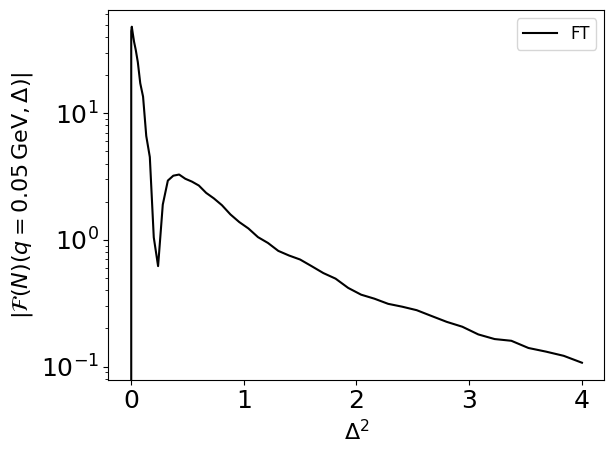

In [143]:
PlotHankelTransformedFixedQ(hankel_interpolator_dipole, 0.05)

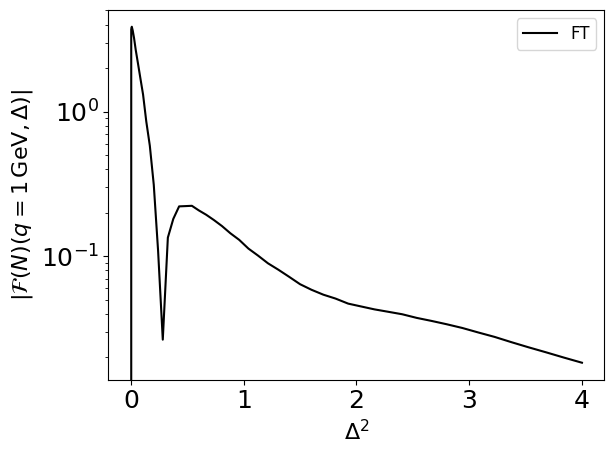

In [144]:
PlotHankelTransformedFixedQ(hankel_interpolator_dipole, 1)

Towards GPDs. 

In this angle-independetnt case I can compute $xH_g(x,\Delta)$ as shown in https://arxiv.org/pdf/1703.02085.pdf eq (11):
$$xH_g(x,\Delta) = \frac{2 N_c}{\alpha_s} \int \mathrm{d}^2 q_t q_T^2 F_0(q,\Delta)$$
where $\mathcal{F}(q,\Delta)=F_0(|q|,|\Delta|) + $ angle dependent part (see eq 7)

As I have neglected the angular dependence, my output from the double Hankel transform is directly $F_0$

First check up to how large $q$ I have smooth numerics...

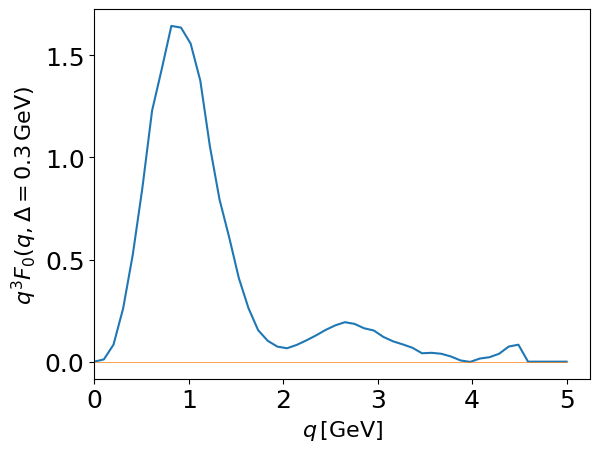

In [149]:
def PlotF0_qdep(interpolator, Delta):
    tmpqvals=np.linspace(0,5)
    plt.plot(tmpqvals, tmpqvals**3*interpolator(tmpqvals,Delta))
    plt.xlabel(r"$q\,[\mathrm{GeV}]$")
    plt.ylabel(r"$q^3 F_0(q,\Delta="+str(Delta) + "\,\mathrm{GeV}$)")
    plt.plot([0, tmpqvals[-1]], [0,0], linestyle="solid", linewidth=0.5)

    plt.xlim(left=0)

PlotF0_qdep(hankel_interpolator_dipole,0.3)

In [88]:
def GPD_H(hankel_interp, Delta, maxq=np.inf):
    alphas=0.2
    Nc=3
    return 2.0*Nc/alphas * scipy.integrate.quad( lambda q: 2.0*np.pi*q*q**2*hankel_interp(q,Delta),0,maxq)[0]


DVCS cross section $d\sigma/dt \sim xH^2$, and experimentally $d\sigma/dt \sim e^{-6t}$. So we should get for $xH$ something like $e^{-2\dots3 |t|}$.

Also above we saw that in the coordinate space the $b$ dependence is $\sim e^{-b^2/(2B)}$ with $B\sim 3\dots 4\,\mathrm{GeV}^{-2}$. Note that a 2D FT of this is $e^{-\Delta^2 B/2}$, so when I fit below $e^{-b^2 B/2}$ I should get $B\sim 3\dots 4\,\mathrm{GeV}^{-2}$.

Below we see that we get way too large value for $B$, I don't undersatnd why. Note that as I fix $\theta(r,b)=\pi/2$, I make my proton as small as possible, and rms radius = $\sqrt{2B}$.

Similarly steep spectrum I saw above when plotting at fixed $q$

/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_21914/1264060699.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 2.0*Nc/alphas * scipy.integrate.quad( lambda q: 2.0*np.pi*q*q**2*hankel_interp(q,Delta),0,maxq)[0]


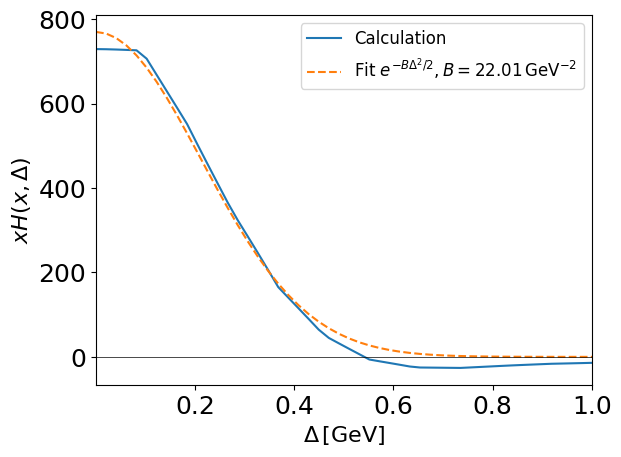

In [163]:
def PlotxH(interpolator):
    tmpDeltavals=np.linspace(1e-3,1)
    data= np.vectorize(GPD_H)(interpolator, tmpDeltavals,maxq=3)
    plt.plot( tmpDeltavals, data, label="Calculation")

    popt,pcov=scipy.optimize.curve_fit(fitfun_gaussian, tmpDeltavals, data)


    # The fifun_baussian is exp(-b*t),I want to fit exp(-Bt/2), so popt[1]=B/2, giving B=2 popt[1]

    plt.plot(tmpDeltavals, fitfun_gaussian(tmpDeltavals, *popt), label=r"Fit $e^{-B\Delta^2/2}, B="+str(round(2*popt[1],2)) + r"\,\mathrm{GeV}^{-2}$", linestyle="dashed")



    plt.plot([tmpDeltavals[0],tmpDeltavals[-1]],[0,0],linewidth=0.5,color="black")
    plt.xlim(left=tmpDeltavals[0],right=tmpDeltavals[-1])
    #plt.xscale("log")
    plt.xlim(right=1)
    plt.xlabel(r"$\Delta\,[\mathrm{GeV}]$")
    plt.ylabel(r"$xH(x,\Delta)$")

    leg=plt.legend(loc="upper right",fontsize=12)

PlotxH(hankel_interpolator_dipole)
#plt.yscale("log")

$q$ and $\Delta$ integrated distributions if they mean anything...

/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_21914/1016207257.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = scipy.integrate.quad(lambda q: 2.0*np.pi*q*hankel_interp(q,d), 0, np.inf)[0]


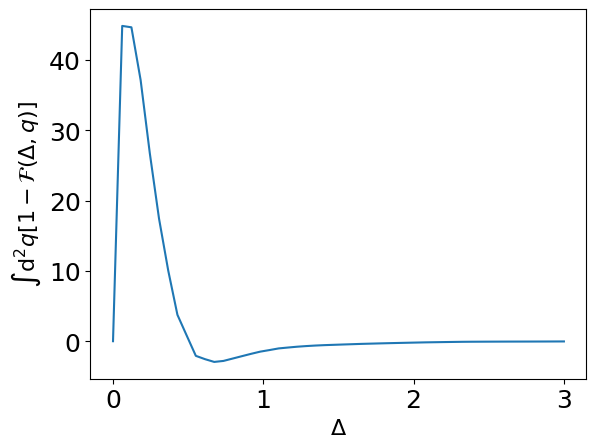

In [107]:
def q_integraed(hankel_interp):
    deltavals=np.linspace(0,3)
    res=[]
    for d in deltavals:
        # note that my hankel_interp is a function of magnitudes of q and Delta, but here
        # I integrate over d^2 q (right?)
        integrated = scipy.integrate.quad(lambda q: 2.0*np.pi*q*hankel_interp(q,d), 0, np.inf)[0]
        res.append(integrated)
    
    
    #plt.plot(deltavals**2, np.max(res)*np.exp(-deltavals**2*4/2), label=r"Gaussian $B=4\,\mathrm{GeV}^{-2}$", color="blue", linestyle="dashed")
    
    plt.xlabel(r"$\Delta$")
    plt.ylabel(r"$\int \mathrm{d}^2q [1-\mathcal{F}(\Delta,q)]$")

    plt.plot(deltavals,res)
    #plt.yscale("log")
q_integraed(hankel_interpolator_dipole)

/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_21914/3635460269.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated = scipy.integrate.quad(lambda Delta: 2.0*np.pi*Delta*hankel_interp(q,Delta), 0, np.inf)[0]
/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_21914/3635460269.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrated = scipy.integrate.quad(lambda Delta: 2.0*np.pi*Delta*hankel_interp(q,Delta), 0, np.inf)[0]


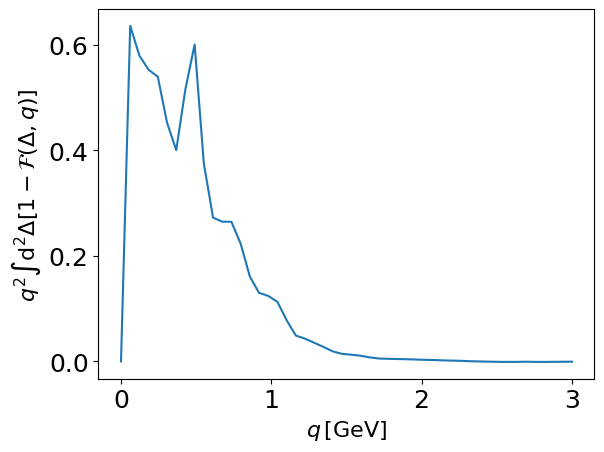

In [108]:
def Delta_integraded(hankel_interp):
    qvals=np.linspace(0,3)
    res=[]
    for q in qvals:
        # note that my hankel_interp is a function of magnitudes of q and Delta, but here
        # I integrate over d^2 Delta (right?)
        integrated = scipy.integrate.quad(lambda Delta: 2.0*np.pi*Delta*hankel_interp(q,Delta), 0, np.inf)[0]
        res.append(integrated)
    
    plt.xlabel(r"$q\,[\mathrm{GeV}]$")
    plt.ylabel(r"$q^2 \int \mathrm{d}^2\Delta [1-\mathcal{F}(\Delta,q)]$")

    plt.plot(qvals,res)
    #plt.yscale("log")
Delta_integraded(hankel_interpolator_dipole)

# FFT, with angular dependence

## Test FFT in 1/2d case

In [ ]:
def testintegrand_1d(x):
    return np.exp(-x**2)

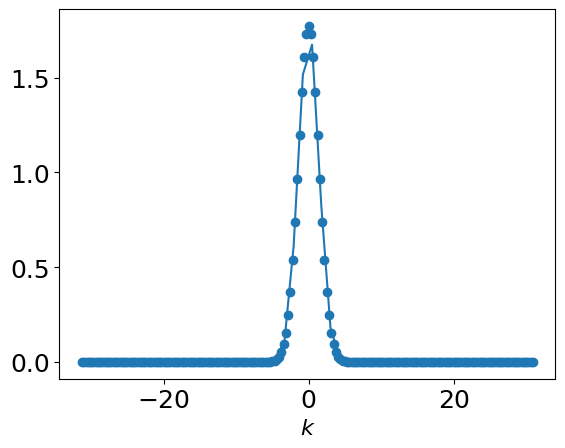

In [ ]:
def FT_1d_test():
    maxx=10
    points=200
    xrange=np.linspace(-maxx,maxx,points)
    da=xrange[1]-xrange[0]
    
    data = testintegrand_1d(xrange)
    f_fft = np.fft.fftshift(np.fft.fftn(data))
    momenta = np.fft.fftshift(np.fft.fftfreq(xrange.shape[0], d=da))*(2.0*np.pi)
    
    plt.scatter(momenta, np.abs(f_fft)*da)
    
    integrand = lambda x,k: np.exp(-1j*k*x)*testintegrand_1d(x)
    comparison=[]
    comparison_momenta=np.linspace(momenta[0],momenta[-1])
    for k in comparison_momenta:
        comparison.append( scipy.integrate.quad(integrand, -np.inf, np.inf, args=k)[0])
        
    plt.plot(comparison_momenta, np.real(comparison), linestyle="solid")
    
    plt.xlabel(r"$k$")
                          
        
FT_1d_test()
#plt.yscale("log")

In [ ]:
1./np.pi

0.3183098861837907

(0.0001, 5.2402550926672635)

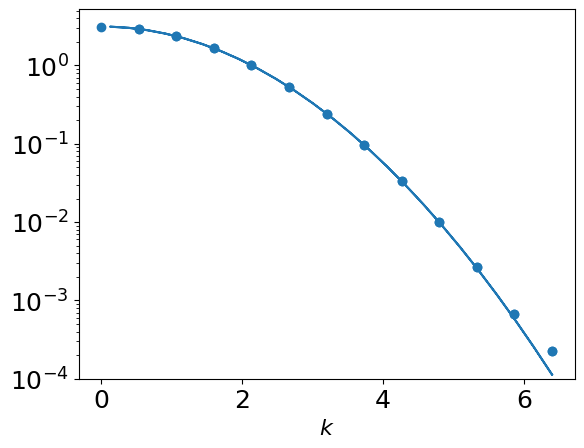

In [ ]:
def FT_2d_test():
    
    gaussian = lambda x,y: np.exp(-x**2-y**2)
    ft_gaussian = lambda kx,ky: np.pi * np.exp(-(kx**2+ky**2)/4)
    
    maxx=8
    points=25
    xrange=np.linspace(-maxx,maxx,points)
    yrange=np.linspace(-maxx,maxx,points)
    da=xrange[1]-xrange[0]
    
    X,Y = np.meshgrid(xrange,yrange)
    
    data = gaussian(X,Y)
    
    
    f_fft = np.fft.fftshift(np.fft.fftn(data))
    momenta = np.fft.fftshift(np.fft.fftfreq(xrange.shape[0], d=da))*2.0*np.pi
    
    ft=[]
    k=[]
    for i,j in zip(range(len(momenta)),range(len(momenta))): #kx=ky
            k.append( (momenta[i]**2+momenta[j]**2)**0.5)
            ft.append( f_fft[i,j] )
    
    plt.scatter(k,np.abs(ft)*da*da)
    
   
    integrand = lambda x,y,kx,ky: np.exp(-1j*kx*x-1j*ky*y)*gaussian(x,y)
    comparison=[]
    comparison_momenta=np.linspace(momenta[0],momenta[-1])
    momenta=[]
    for kx,ky in zip(comparison_momenta,comparison_momenta):
        #k_x=k_y
        #comparison.append( ft_gaussian(kx,ky) )
        #comparison.append( scipy.integrate.dblquad(integrand, -np.inf, np.inf, -np.inf, np.inf, args=(2.*np.pi*kx, 2.0*np.pi*ky))[0])
        #print(kx,ky,comparison[-1], ft_gaussian(2*np.pi*kx,2*np.pi*ky) )
        comparison.append(ft_gaussian(kx,ky) )
        momenta.append( (kx**2+ky**2)**0.5)
        
    plt.plot(momenta, np.real(comparison), linestyle="solid")
    
    plt.xlabel(r"$k$")
                          
        
FT_2d_test()
plt.yscale("log")
plt.ylim(bottom=1e-4)

In [ ]:
 
    #index_array = np.argsort(k)
    
    #kT_sorted = np.empty(len(index_array))
    #ft_sorted = np.empty(len(index_array))
    #for ik in range(len(index_array)) :
    #    kT_sorted[ik] = k[index_array[ik]]
    #    ft_sorted[ik] = ft[index_array[ik]]
        
    #df = pd.DataFrame({"k":k, "ft":np.abs(ft)})
    
    #ktbins=5
    #print(df.k)
    #bins = pd.cut(df.k, np.arange(0,max(momenta), max(momenta)/ktbins) )
    #binned=df.groupby(bins).agg({"ft": "mean", "k": "mean"})
    #print(binned)
    #plt.scatter(binned["k"],binned["ft"])
    #print(bins)
    
    #plt.hist(kT_sorted, np.abs(ft_sorted)*da*da)    
    #plt.plot(kT_sorted, np.abs(ft_sorted))    
           
    #plt.scatter(momenta[0:len(momenta)//2], np.abs(ft)/len(xrange))
    
    
    #return
    
    
    #plt.scatter(momenta, np.abs(f_fft)*da)
    

### PyFFT

In [ ]:
def FT_1d_test_pyfftw():
    maxx=10
    points=55
    xrange=np.linspace(-maxx,maxx,points)
    
    data = testintegrand_1d(xrange)
    f_fft = np.fft.fftshift(np.fft.fftn(data))
    momenta = np.fft.fftshift(np.fft.fftfreq(xrange.shape[0], d=xrange[1]-xrange[0]))
    
    plt.scatter(momenta, np.abs(f_fft))
    
    integrand = lambda x,k: np.exp(-1j*k*x)*testintegrand_1d(x)
    comparison=[]
    comparison_momenta=np.linspace(momenta[0],momenta[-1])
    for k in comparison_momenta:
        comparison.append( scipy.integrate.quad(integrand, -np.inf, np.inf, args=2.*np.pi*k)[0])
        
    plt.plot(comparison_momenta, np.sqrt(2.0*np.pi)*np.real(comparison), linestyle="solid")
                          
        
FT_1d_test()

## FFT, compute dipole in momentum space

Compute $\mathcal{F}=\int \frac{\mathrm{d}^2 r \mathrm{d}^2 b}{(2\pi)^4} e^{i\Delta \cdot b} e^{iq \cdot r} S(b+r/2,b-r/2)$ (TODO: Think if $b=(x_1+x_2)/2$ here or not?)

Note diffractive PDF: https://journals.aps.org/prd/pdf/10.1103/PhysRevD.106.094015

Note: this requries that $S\to 0$ at large r,b. BUT: our $S\to 1$ at large $b$, and from lattice-MV $S\to 1$ at large $r$ (MV parametriation ives $S\to 0$ at large $r$)

In [ ]:
def ScaleAngle(th):
    """ My table is for the angle between r and b from 0 to pi/2 """
    """ Transform the angle th to this region """
    if th < 0: 
        th = -th
    
    while th > np.pi:
        th -= np.pi
    
    # Now we are between [0,pi]
    
    if th > np.pi/2:
        th = np.pi - th
    return th
    
    

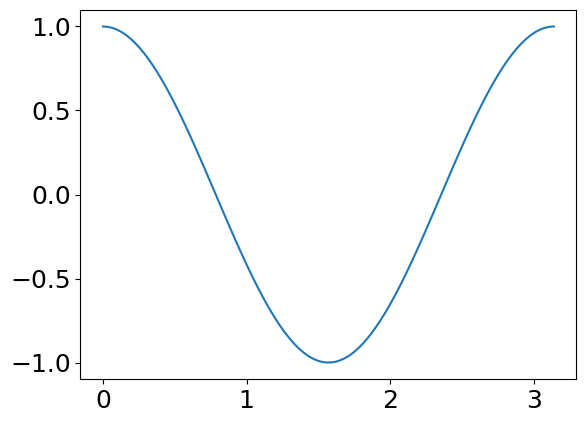

In [ ]:
thvals=np.linspace(0*np.pi, np.pi,num=100)
plt.plot(thvals,[np.cos(2*ScaleAngle(t)) for t in thvals])

Ok, continuous as it should be!

In [ ]:
def S_matrix_xy(interpolator, rx, ry, bx, by):
    b=np.sqrt(bx**2+by**2)
    r=np.sqrt(rx**2+ry**2)
    
    th = np.arccos((rx*bx + ry*by)/(np.sqrt(rx**2+ry**2)*np.sqrt(bx**2+by**2)))
    th = ScaleAngle(th)
    
    if np.isnan(th):
        th=0
   
    return 1-interpolator(r,b,th) # Return S, not 

In [ ]:
dipole_interpolator(1,0,0)

array(0.13443111)

In [ ]:
S_matrix_xy(dipole_interpolator,1,0,2,1)

0.9280154779986073

Check that my S does not depend on the orientation of b.

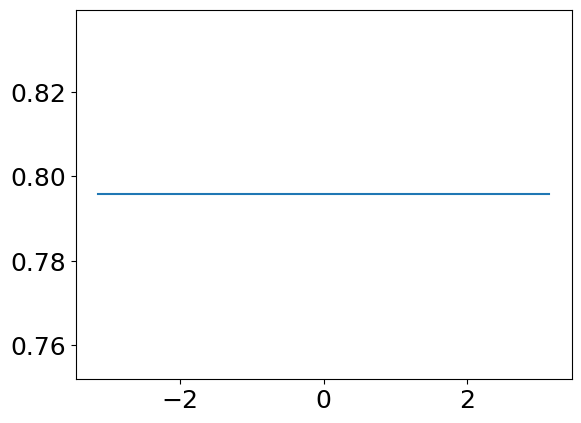

In [ ]:
def TestFFTInput(interpolator):
    r=3
    b=2
    rbangle=1
    th=np.linspace(-np.pi,np.pi)
    
    plt.plot(th, np.vectorize(S_matrix_xy)(interpolator, r*np.cos(th+rbangle), r*np.sin(th+rbangle), b*np.cos(th), b*np.sin(th)))
    
TestFFTInput(dipole_interpolator)

Check $b$ dependence at. fixed r

In [ ]:
def TestDipoleBdep(interpolator, r=1 ):
    thvals=np.linspace(0,2.0*np.pi)
    avgdip=[]
    bvals=np.linspace(0.,10)
    for b in bvals:
        avgdip.append(1-np.mean(np.vectorize(S_matrix_xy)(interpolator,r*np.cos(thvals),r*np.sin(thvals),b,0)))
    
    plt.plot(bvals, avgdip)
    
    plt.fill_between(bvals, dipole_interpolator(r, bvals, 0), dipole_interpolator(r, bvals, np.pi/2), alpha=0.2)
    
    plt.ylabel(r"$N$")
TestDipoleBdep(dipole_interpolator)

NameError: name 'S_matrix_xy' is not defined

/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_68618/734184683.py:5: RuntimeWarning: invalid value encountered in scalar divide
  th = np.arccos((rx*bx + ry*by)/(np.sqrt(rx**2+ry**2)*np.sqrt(bx**2+by**2)))


[0.         0.04167362 0.09021603 0.14811684 0.19278804 0.23140489
 0.26012813 0.27863914 0.29138329 0.29467201 0.29462725 0.29173981
 0.28065639 0.2672275  0.25057258 0.23271022 0.2141529  0.1942418
 0.17481339 0.15576559 0.13819688 0.12151017 0.10569578 0.0916332
 0.07856464 0.06708695 0.05704402 0.04782886 0.04027814 0.0338015
 0.0280406  0.02352378 0.01949289 0.01601931 0.01333202 0.01095851
 0.00905978 0.00754182 0.00621993 0.00521143 0.00434518 0.00358211
 0.00302047 0.00252074 0.00210346 0.00176913 0.00147157 0.00123291
 0.00103577 0.00086187]


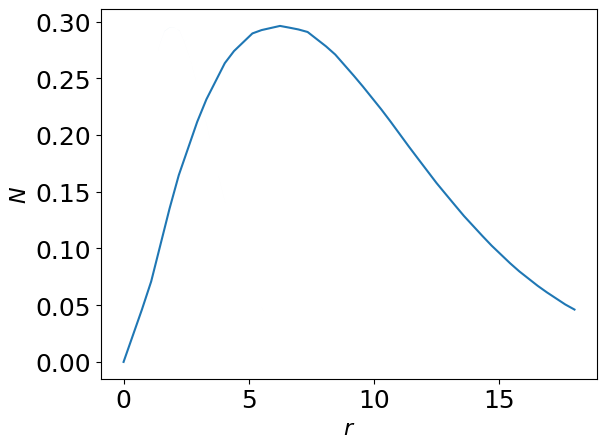

In [ ]:
def TestDipoleRdep(interpolator, b=0 ):
    thvals=np.linspace(0,2.0*np.pi)
    avgdip=[]
    rvals=np.linspace(0.,18)
    for r in bvals:
        avgdip.append(1-np.mean(np.vectorize(S_matrix_xy)(interpolator,r*np.cos(thvals),r*np.sin(thvals),b,0)))
    
    plt.plot(rvals, avgdip)
    
    plt.fill_between(bvals, dipole_interpolator(rvals, b, 0), dipole_interpolator(rvals, b, np.pi/2), alpha=0.2)
    print(dipole_interpolator(rvals, b, 0))

    plt.ylabel(r"$N$")
    plt.xlabel(r"$r$")
TestDipoleRdep(dipole_interpolator)

Actual FT

In [ ]:
def ComputeMomentumSpaceDipoleFFT(interpolator):
    maxr=20
    maxb=20
    points=50
    rxrange=np.linspace(-maxr,maxr,points)
    ryrange=np.linspace(-maxr,maxr,points)
    bxrange=np.linspace(-maxb,maxb,points)
    byrange=np.linspace(-maxb,maxb,points)
    
    # Generate a grid of parameter values
    A, B, C, D = np.meshgrid(rxrange, ryrange, bxrange, byrange)
    
    print(A.shape,D.shape)
    
    
    f_evaluated = 1-np.vectorize(S_matrix_xy)(interpolator, A,B,C,D)
    
    
    f_fft = np.fft.fftshift(np.abs(np.fft.fftn(f_evaluated)))
    f_fft *= (rxrange[1]-rxrange[0])* (ryrange[1]-ryrange[0])*(bxrange[1]-bxrange[0])* (byrange[1]-byrange[0])
    
    #print (f_fft.shape)
    
    momenta = np.fft.fftshift(np.fft.fftfreq(rxrange.shape[0], d=rxrange[1]-rxrange[0]))*2.0*np.pi
    
    return momenta, f_fft


    

Gaussian interpolator to test integration

In [ ]:
gaussian = lambda r,b,th: np.exp(-r**2-b**2)

In [ ]:
fftmomenta, fftres=ComputeMomentumSpaceDipoleFFT(dipole_interpolator)

(50, 50, 50, 50) (50, 50, 50, 50)


/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_68618/734184683.py:5: RuntimeWarning: invalid value encountered in arccos
  th = np.arccos((rx*bx + ry*by)/(np.sqrt(rx**2+ry**2)*np.sqrt(bx**2+by**2)))


In [ ]:
#fftmomenta, fftres=ComputeMomentumSpaceDipoleFFT(gaussian)

(20, 20, 20, 20) (20, 20, 20, 20)


/var/folders/c6/4675j3jn41xf23mjbwwtqpm00000gp/T/ipykernel_68618/566336549.py:5: RuntimeWarning: invalid value encountered in arccos
  th = np.arccos((rx*bx + ry*by)/(np.sqrt(rx**2+ry**2)*np.sqrt(bx**2+by**2)))


In [ ]:
fftdata = pd.DataFrame(columns=["qx","qy","deltax","deltay","ft"], index=range(len(fftmomenta)**4) )

In [ ]:
fftdata.iloc[0]

qx        NaN
qy        NaN
deltax    NaN
deltay    NaN
ft        NaN
Name: 0, dtype: object

In [ ]:
len(fftmomenta)**4

2560000

In [ ]:
fftdata = pd.DataFrame(columns=["qx","qy","deltax","deltay","ft"], index=range(len(fftmomenta)**4) )
n=-1
for i in range(len(fftmomenta)):
    for j in range(len(fftmomenta)):
        for k in range(len(fftmomenta)):
            for l in range(len(fftmomenta)):
                n=n+1                
                fftdata.iloc[n]["qx"]=fftmomenta[i]
                fftdata.iloc[n]["qy"]=fftmomenta[j]
                fftdata.iloc[n]["deltax"]=fftmomenta[k]
                fftdata.iloc[n]["deltay"]=fftmomenta[l]
                fftdata.iloc[n]["ft"]=fftres[i,j,k,l]
                #new_data = {fftdata.columns[0]:qx,fftdata.columns[1]:qy,fftdata.columns[2]:dx,fftdata.columns[3]:qy,fftdata.columns[4]:ft}
                #fftdata.loc[len(fftdata)]=new_data

In [ ]:
fftdata

,qx,qy,deltax,deltay,ft
0,-3.25,-3.25,-3.25,-3.25,0.17643
1,-3.25,-3.25,-3.25,-3.0875,0.010523
2,-3.25,-3.25,-3.25,-2.925,0.020858
3,-3.25,-3.25,-3.25,-2.7625,0.010222
4,-3.25,-3.25,-3.25,-2.6,0.008638
...,...,...,...,...,...
2559995,3.0875,3.0875,3.0875,2.4375,0.002286
2559996,3.0875,3.0875,3.0875,2.6,0.003465
2559997,3.0875,3.0875,3.0875,2.7625,0.012841
2559998,3.0875,3.0875,3.0875,2.925,0.007776


In [ ]:
fftdata["q"]=(fftdata["qx"]**2+fftdata["qy"]**2)**0.5

In [ ]:
fftdata["delta"]=(fftdata["deltax"]**2+fftdata["deltay"]**2)**0.5

In [ ]:
fixed_q = fftdata[ (fftdata["q"]<0.5) & (fftdata["q"]>0.4) ]

In [ ]:
fixed_q

,qx,qy,deltax,deltay,ft,q,delta
1120000,-0.4875,0.0,-3.25,-3.25,0.005305,0.4875,4.596194
1120001,-0.4875,0.0,-3.25,-3.0875,0.003444,0.4875,4.482762
1120002,-0.4875,0.0,-3.25,-2.925,0.00069,0.4875,4.372428
1120003,-0.4875,0.0,-3.25,-2.7625,0.000996,0.4875,4.265432
1120004,-0.4875,0.0,-3.25,-2.6,0.003479,0.4875,4.162031
...,...,...,...,...,...,...,...
1505595,0.4875,0.0,3.0875,2.4375,0.002139,0.4875,3.933708
1505596,0.4875,0.0,3.0875,2.6,0.00846,0.4875,4.036416
1505597,0.4875,0.0,3.0875,2.7625,0.002707,0.4875,4.142953
1505598,0.4875,0.0,3.0875,2.925,0.002089,0.4875,4.253032


In [ ]:
ktbins=40
#print(df.k)
bins = pd.cut(fftdata.delta, np.arange(0,max(fftdata["q"]), max(fftdata["q"])/ktbins) )
print(bins)
binned=fixed_q.groupby(bins).agg({"ft": "mean", "delta": "mean"})


0                     NaN
1                     NaN
2          (4.366, 4.481]
3          (4.251, 4.366]
4          (4.137, 4.251]
                ...      
2559995    (3.907, 4.022]
2559996    (4.022, 4.137]
2559997    (4.137, 4.251]
2559998    (4.251, 4.366]
2559999    (4.251, 4.366]
Name: delta, Length: 2560000, dtype: category
Categories (39, interval[float64, right]): [(0.0, 0.115] < (0.115, 0.23] < (0.23, 0.345] < (0.345, 0.46] ... (4.022, 4.137] < (4.137, 4.251] < (4.251, 4.366] < (4.366, 4.481]]


In [ ]:
binned

,ft,delta
delta,,
"(0.0, 0.115]",NaN,NaN
"(0.115, 0.23]",0.388307,0.196155
"(0.23, 0.345]",0.022301,0.325
"(0.345, 0.46]",0.104402,0.395447
"(0.46, 0.575]",0.073424,0.50508
"(0.575, 0.689]",0.045886,0.632363
"(0.689, 0.804]",0.017537,0.714291
"(0.804, 0.919]",0.026406,0.845512
"(0.919, 1.034]",0.026717,0.986063


(0.0, 3.0)

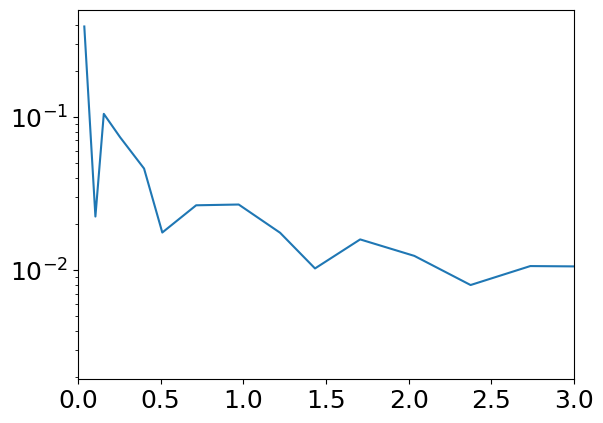

In [ ]:
plt.plot(binned["delta"]**2,binned["ft"])
plt.yscale("log")
plt.xlabel(r"$\Delta^2$")
plt.xlim(left=0,right=3)

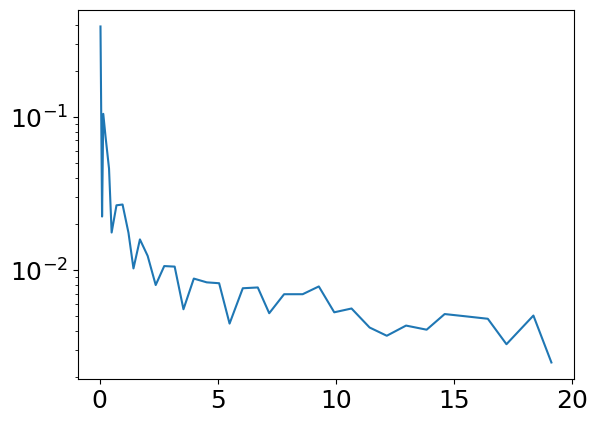

In [ ]:
plt.plot(binned["delta"]**2,binned["ft"])
plt.yscale("log")

In [ ]:
bins

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
159995    (1.075, 1.209]
159996    (1.075, 1.209]
159997    (1.075, 1.209]
159998    (1.075, 1.209]
159999    (1.075, 1.209]
Name: delta, Length: 160000, dtype: category
Categories (9, interval[float64, right]): [(0.0, 0.134] < (0.134, 0.269] < (0.269, 0.403] < (0.403, 0.537] ... (0.672, 0.806] < (0.806, 0.94] < (0.94, 1.075] < (1.075, 1.209]]

In [ ]:
def EvaluateFFT_fixed_q_Delta_angle_avg(momenta,fft,q,Delta):
    data=[]
    for th_d in np.linspace(-np.pi,np.pi):
        dx = Delta*np.cos(th_d)
        dy=Delta*np.sin(th_d)
        
        for th_q in np.linspace(-np.pi,np.pi):
            qx = q*np.cos(th_q)
            qy=q*np.sin(th_q)
            
    
            qx_id = np.abs(momenta-qx).argmin()
            qy_id = np.abs(momenta-qy).argnew_data
            dx_id=np.abs(momenta-dx).argmin()
            dy_id=np.abs(momenta-dy).argmin()
            
            
            data.append(fft[qx_id,qy_id,dx_id,dy_id])
    
    return np.mean(data)
    

In [ ]:
EvaluateFFT_fixed_q_Delta_angle_avg(fftmomenta,fftres,0.1,0.2)

(-0.40427666544670293-0.010965544333483394j)

In [ ]:
140.01+160.01*6+120.01

1220.08

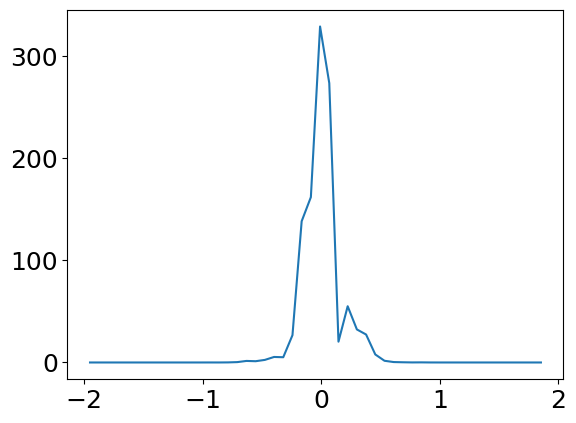

In [ ]:
def TestDeltadep(q):
    deltavals=np.linspace(np.min(fftmomenta), np.max(fftmomenta))
    data=[]
    for d in deltavals:
        data.append(EvaluateFFT_fixed_q_Delta_angle_avg(fftmomenta, fftres, q, d))
    
    plt.plot(deltavals,np.abs(data))
    
TestDeltadep(0.2)

In [ ]:
fftmomenta